Investors and traders make buying and selling decisions of stocks based on the current and past data. There are many approaches to formalize a strategy and make investment decision, but one of the popular approach is doing a technical analysis. Technical analyst observes the historic patterns of the stock market to make predictions about its future performance. 
One of the most controversial issue in finance is possibly whether the market is efficient or not. The efficient market hypothesis (EMH) states that share prices reflect all information. If the stock prices, correctly and fully reflect all the relevant information, then no arbitrage opportunities would exist. 
One of the first intuitive steps to take when studying market efficiency is to look at serial autocorrelation in the returns. Autocorrelation is a characteristic of data which refers to the degree of correlation of the same variables between two successive time intervals. The predictability of stock returns based on past returns, is essential to examine the stock market efficiency hypothesis. We can find whether the past prices are fully reflected in the current stock prices with the help of autocorrelation, also known as serial correlation. 


In [48]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15) 

In [49]:
df = pd.read_csv('ULTRACEMCO.NS (1).csv',parse_dates=[0])

In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-02,3854.199951,3950.350098,3854.199951,3930.899902,3898.003906,581089
1,2017-10-09,3925.699951,4020.000000,3882.899902,4005.000000,3971.483643,951799
2,2017-10-16,4040.000000,4188.649902,3985.399902,4034.350098,4000.588135,1390462
3,2017-10-23,4049.000000,4510.000000,4049.000000,4439.850098,4402.694824,2232579
4,2017-10-30,4445.000000,4486.000000,4354.000000,4375.100098,4338.486816,594247


In [51]:
df.shape #to get the number of rows and column

(157, 7)

In [52]:
df = df[['Date','Adj Close']] # extract the desired columns

In [53]:
df.shape

(157, 2)

In [54]:
df.info() #metadat about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       157 non-null    datetime64[ns]
 1   Adj Close  157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [55]:
df.isnull().sum()  #check for null values

Date         0
Adj Close    0
dtype: int64

In [56]:
df.describe()

,Adj Close
count,157.000000
mean,4029.908786
std,318.810513
min,3032.040771
25%,3849.665527
50%,4039.514160
75%,4245.714355
max,4772.781738


In [57]:
df['Log Returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1)) #calculate the log returns

In [58]:
df = df.set_index('Date')

In [59]:
df.head()

,Adj Close,Log Returns
Date,,
2017-10-02,3898.003906,NaN
2017-10-09,3971.483643,0.018675
2017-10-16,4000.588135,0.007302
2017-10-23,4402.694824,0.095775
2017-10-30,4338.486816,-0.014691


#Summarize the data

In [60]:
df.describe()

,Adj Close,Log Returns
count,157.000000,156.000000
mean,4029.908786,0.000244
std,318.810513,0.039359
min,3032.040771,-0.128275
25%,3849.665527,-0.019458
50%,4039.514160,-0.002673
75%,4245.714355,0.020667
max,4772.781738,0.101356


In [61]:
df.dropna().describe() #summarize the data

,Adj Close,Log Returns
count,156.000000,156.000000
mean,4030.754330,0.000244
std,319.660626,0.039359
min,3032.040771,-0.128275
25%,3849.664856,-0.019458
50%,4041.183960,-0.002673
75%,4247.246948,0.020667
max,4772.781738,0.101356


In [62]:
df = df.dropna()

In [63]:
skewness_kurtosis = pd.concat([pd.Series(df.skew().values),pd.Series(df.kurtosis().values)],1)
skewness_kurtosis.columns = ['Skewness','Kurtosis']
skewness_kurtosis.index = df.skew().index

In [64]:
skewness_kurtosis

,Skewness,Kurtosis
Adj Close,-0.353034,0.272447
Log Returns,-0.089847,0.745447


#Time series plots

(array([736573., 736695., 736815., 736938., 737060., 737180., 737303.,
        737425., 737546., 737669.]),
 <a list of 10 Text major ticklabel objects>)

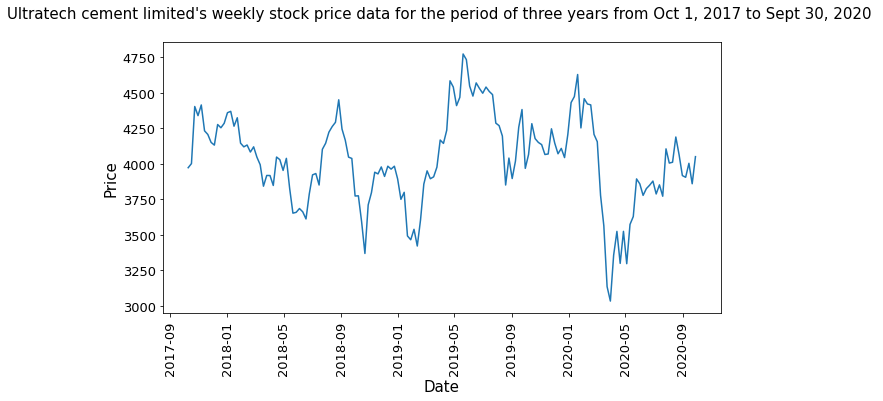

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df['Adj Close'])
ax.set_title('Ultratech cement limited\'s weekly stock price data for the period of three years from Oct 1, 2017 to Sept 30, 2020 \n',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
ax.tick_params(axis='both', which='major',labelsize=13)
plt.xticks(rotation=90)

(array([736573., 736695., 736815., 736938., 737060., 737180., 737303.,
        737425., 737546., 737669.]),
 <a list of 10 Text major ticklabel objects>)

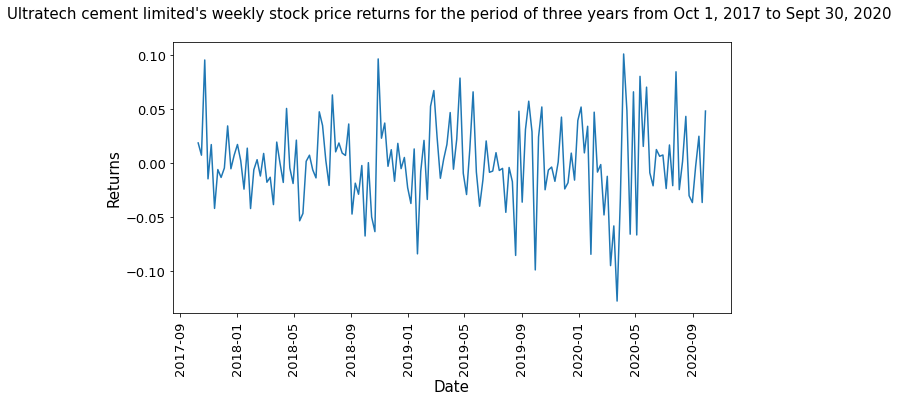

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df['Log Returns'])
ax.set_title('Ultratech cement limited\'s weekly stock price returns for the period of three years from Oct 1, 2017 to Sept 30, 2020 \n',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Returns',fontsize=15)
ax.tick_params(axis='both', which='major',labelsize=13)
plt.xticks(rotation=90)


#Lagged scatter plot

There are some periods having higher returns and some have lower returns.
Volatility isn’t the same always.

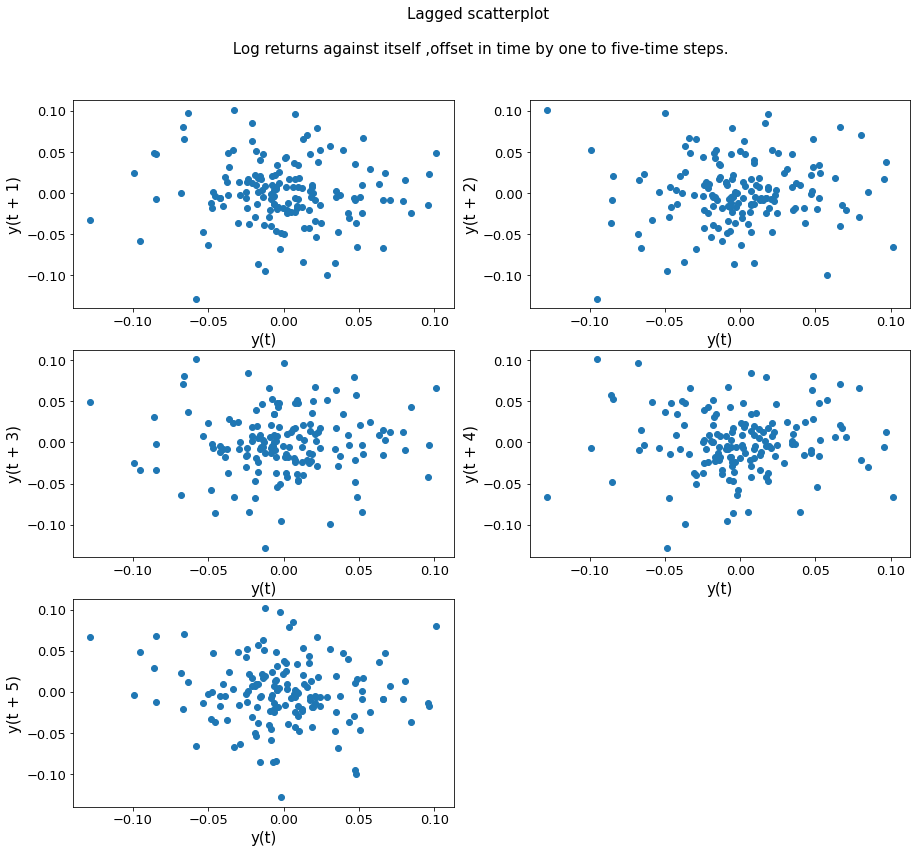

In [67]:
from pandas.plotting import lag_plot
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 13))
fig.delaxes(ax6)
fig.suptitle('Lagged scatterplot\n\n Log returns against itself ,offset in time by one to five-time steps.',fontsize=15)
lag_plot(df['Log Returns'], lag=1,ax=ax1)
lag_plot(df['Log Returns'], lag=2,ax=ax2)
lag_plot(df['Log Returns'], lag=3,ax=ax3)
lag_plot(df['Log Returns'], lag=4,ax=ax4)
lag_plot(df['Log Returns'], lag=5,ax=ax5)


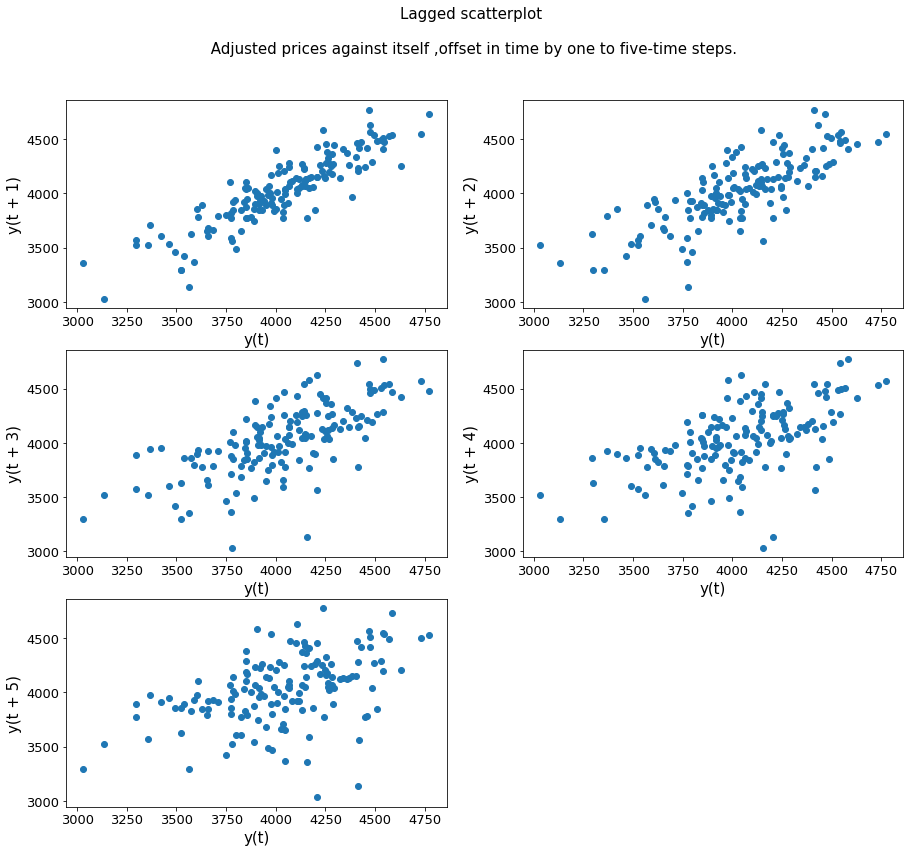

In [79]:
from pandas.plotting import lag_plot
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 13))
fig.delaxes(ax6)
fig.suptitle('Lagged scatterplot\n\n Adjusted prices against itself ,offset in time by one to five-time steps.',fontsize=15)
lag_plot(df['Adj Close'], lag=1,ax=ax1)
lag_plot(df['Adj Close'], lag=2,ax=ax2)
lag_plot(df['Adj Close'], lag=3,ax=ax3)
lag_plot(df['Adj Close'], lag=4,ax=ax4)
lag_plot(df['Adj Close'], lag=5,ax=ax5)

#ACF plots

[Text(0, 0.5, 'Autocorrelation value'),
 Text(0.5, 0, 'Lag'),
 Text(0.5, 1.0, 'Autocorrelation plot of the log returns')]

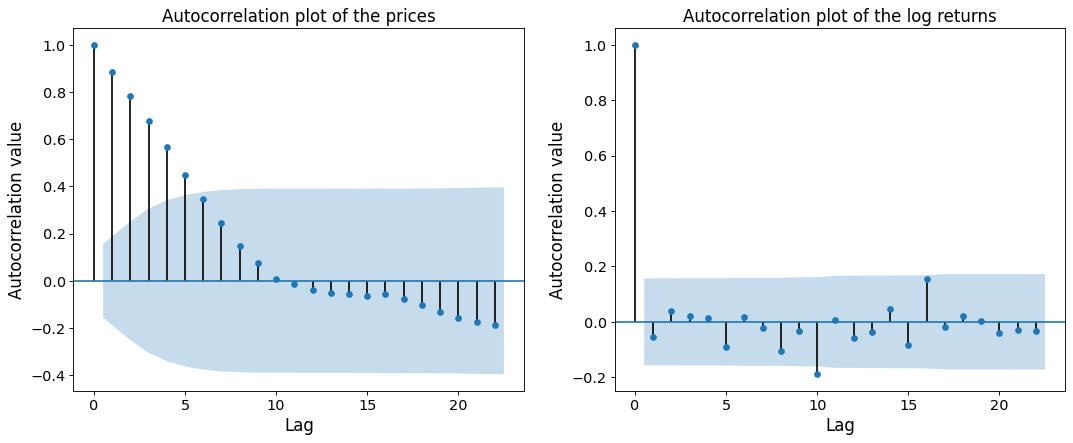

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,6), dpi = 80)
plot_acf(df['Adj Close'].dropna(), ax = ax1)
ax1.set(title='Autocorrelation plot of the prices', ylabel='Autocorrelation value', xlabel='Lag')
plot_acf(df['Log Returns'].dropna(), ax = ax2)
ax2.set(title='Autocorrelation plot of the log returns', ylabel='Autocorrelation value', xlabel='Lag')

Overall, the auto-correlation values go on decreasing and suddenly increases for few lags. But almost all the autocorrelation values are within th confidence interval except for the value at lag 10.
There is no auto-correlation in the log returns.

[Text(0, 0.5, 'Squared Log Returns'),
 Text(0.5, 0, 'Lag'),
 Text(0.5, 1.0, 'Autocorrelation plot of squared log returns')]

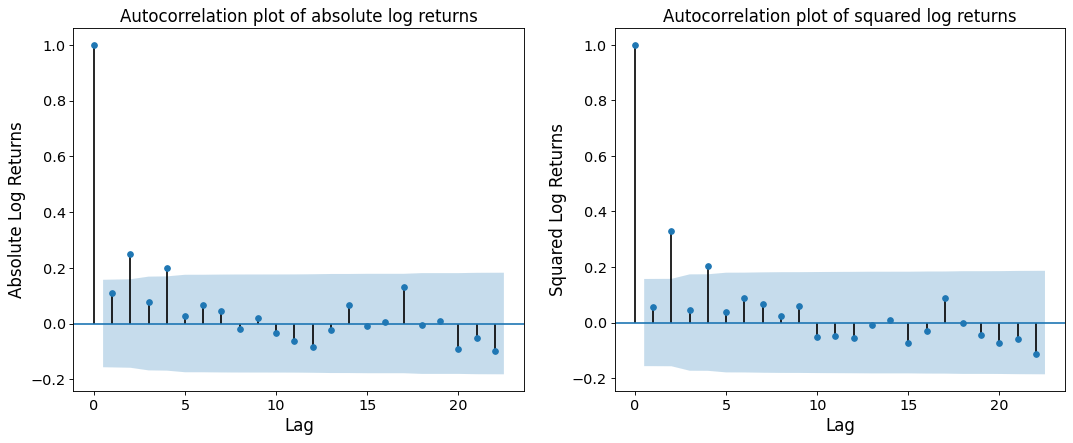

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,6), dpi = 80)
plot_acf(np.abs(df['Log Returns'].dropna()), ax = ax1)
ax1.set(title='Autocorrelation plot of absolute log returns', ylabel='Absolute Log Returns', xlabel='Lag')
plot_acf((df['Log Returns'].dropna())**2, ax = ax2)
ax2.set(title='Autocorrelation plot of squared log returns', ylabel='Squared Log Returns', xlabel='Lag')

* For both the above graphs, we can see that the auto-correlation values corresponding to lag values 2 and 4 are lying outside the confidence interval.
* There is decreasing auto-correlation for both absolute and squared log returns.

#Ljung-box test

In [71]:
lb_test_ADJ_CLOSE = pd.DataFrame(sm.stats.acorr_ljungbox(df['Adj Close'],lags=20)).T
lb_test_ADJ_CLOSE.columns = ['Test statistic','p-value']
lb_test_ADJ_CLOSE.index.name = 'Lags'

In [72]:
lb_test_ADJ_CLOSE['Reject H0'] = lb_test_ADJ_CLOSE['p-value'].apply(lambda x:'True' if x<=0.05 else 'False')

In [73]:
lb_test_ADJ_CLOSE.index = lb_test_ADJ_CLOSE.index+1

In [74]:
print('\t---Ljung–Box test for adjusted prices---')
lb_test_ADJ_CLOSE

	---Ljung–Box test for adjusted prices---


,Test statistic,p-value,Reject H0
Lags,,,
1,124.552977,6.375410e-29,True
2,223.153535,3.490002e-49,True
3,297.422945,3.593423e-64,True
4,349.436579,2.320748e-74,True
5,381.944586,2.306817e-80,True
6,401.784504,1.155643e-83,True
7,411.859458,6.821112e-85,True
8,415.574346,8.712996e-85,True
9,416.518784,4.082179e-84,True


In [75]:
lb_test_log_returns = pd.DataFrame(sm.stats.acorr_ljungbox(df['Log Returns'].dropna(),lags=20)).T
lb_test_log_returns.columns = ['Test statistic','p-value']
lb_test_log_returns.index.name = 'Lags'

In [76]:
lb_test_log_returns['Reject H0'] = lb_test_log_returns['p-value'].apply(lambda x:'True' if x<=0.05 else 'False')

In [77]:
lb_test_log_returns.index = lb_test_log_returns.index+1

In [78]:
print('\t---Ljung–Box test for log returns---')
lb_test_log_returns

	---Ljung–Box test for log returns---


,Test statistic,p-value,Reject H0
Lags,,,
1,0.492075,0.483003,False
2,0.758638,0.684327,False
3,0.831136,0.842006,False
4,0.859690,0.930271,False
5,2.235070,0.815754,False
6,2.277651,0.892475,False
7,2.372482,0.936389,False
8,4.185627,0.839999,False
9,4.375685,0.884994,False


From the Ljung-box test, we can say there is significant autocorrelation between the Adjusted prices and its lagged version.

From the Ljung-box test, we can say there is no serial correlation  between the log returns and any of its lagged version.

The randomness of the Adjusted prices and the log returns are assessed  with the help of serial autocorrelation and Ljung-Box test. Weekly stock price data of Ultratech Cement Limited company for the period of 3 years from October 1, 2017 to September 30, 2020 has autocorrelation that decay very slowly. This means they have some memory of past events. But the returns behave differently. The lagged scatter plots between the returns and its lagged version are most probably random and have weak or no correlation. The autocorrelation values for the log returns go on decreasing and suddenly increases for few lags, mostly all the values are within the confidence interval except for the value at lag 10. The ljung box test helps us to conclude that all the autocorrelation coefficients of the log returns up to order 20 are equal to zero i.e. the log returns are independently distributed.  Hence, we can say that probably the market is weakly efficient and technical analysis is an ineffective way of predicting stock returns.